In [75]:
%matplotlib inline
import os
os.listdir('sounds')

['C4.aiff']

In [85]:
import aifc



216469

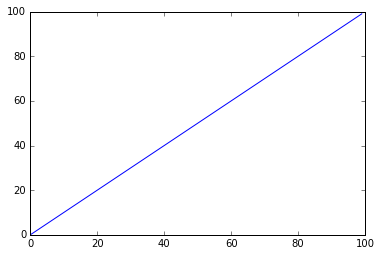

In [100]:
import matplotlib.pyplot as plt

t = range(100)
#test plot
plt.plot(t, t)

In [170]:
%%time

#read the sound
test_sound = 'sounds/C4.aiff'
sound_obj = aifc.open(test_sound)
num_frames = sound_obj.getnframes()
#the sound is approximately 30 seconds, so sample_frames contains approximately 5 seconds of data
sample_frames = num_frames // 6
sample_frames

#plot the time domain
raw_time_signal = sound_obj.readframes(num_sample_frames)
print len(raw_time_signal)

1298814
865876
CPU times: user 519 µs, sys: 1.53 ms, total: 2.05 ms
Wall time: 1.07 ms


In [108]:
import numpy as np

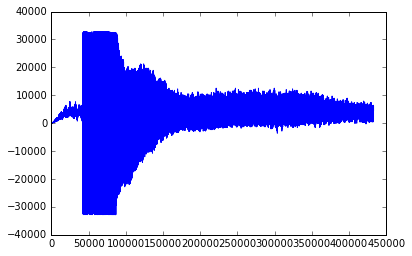

In [124]:
#we need to conver the raw bytes to integer values
signal = np.fromstring(raw_time_signal, 'Int16')
#time domain signal
plt.plot(signal)

In [127]:
%%time
#convert to frequency domain (takes ~800ms on this machine, which might be an issue)
freq_signal = np.fft.fft(signal)

CPU times: user 798 ms, sys: 3.44 ms, total: 801 ms
Wall time: 800 ms


In [129]:
%%time
#getting magnitude (necessary for plotting), is quick
freq_domain_mag = np.abs(freq_signal)

CPU times: user 5.98 ms, sys: 485 µs, total: 6.47 ms
Wall time: 5.64 ms


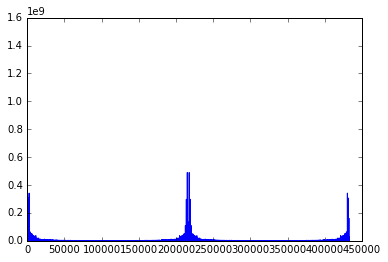

In [140]:
plt.plot(freq_domain_mag)

In [180]:
%time
#nframes is arbitrarily selected to approximate 5 seconds of audio
def get_freq_signal(filename, nframes=1298814, n = None):
    _sound_obj = aifc.open(filename)
    raw_signal = _sound_obj.readframes(nframes)
    time_domain_sig = np.fromstring(raw_signal, 'Int16')
    freq_signal = np.fft.fft(time_domain_sig, n = n)
    magnitude_freq_sig = np.abs(freq_signal)
    return magnitude_freq_sig



CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 11.9 µs


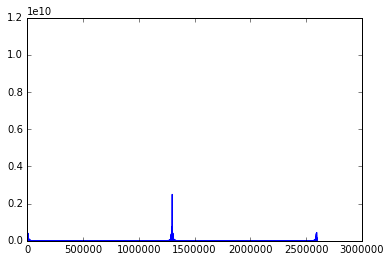

In [172]:
%time
A1 = 'sounds/A1.aiff'
plt.plot(get_freq_signal(A1))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs


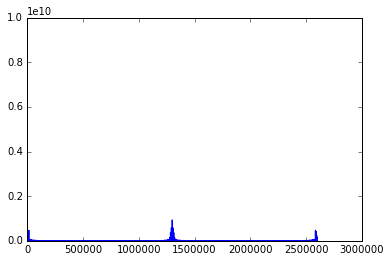

In [189]:
%time
C4 = 'sounds/C4.aiff'
f_sig = get_freq_signal(C4, n=None)
plt.plot(f_sig)